In this tutorial, we will explore what attributes are the biggest indicators of happiness.

In [20]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt

In [29]:
# reading in each csv
df_2015 = pd.read_csv('Data/2015.csv')
df_2016 = pd.read_csv('Data/2016.csv')
df_2017 = pd.read_csv('Data/2017.csv')
df_2018 = pd.read_csv('Data/2018.csv')
df_2019 = pd.read_csv('Data/2019.csv')
df_2020 = pd.read_csv('Data/2020.csv')

In [31]:
# renaming columns so that it is more organized when merging
df_2017['Country'].nunique()
df_2017=df_2017.rename(columns={"Happiness.Score": "Happiness Score"})

In [32]:
# renaming columns so that it is more organized when merging
df_2018['Country or region'].nunique()
df_2018=df_2018.rename(columns={"Country or region": "Country"})
df_2018=df_2018.rename(columns={"Score": "Happiness Score"})

In [33]:
# renaming columns so that it is more organized when merging
df_2019['Country or region'].nunique()
df_2019=df_2019.rename(columns={"Country or region": "Country"})
df_2019=df_2019.rename(columns={"Score": "Happiness Score"})

In [34]:
# renaming columns so that it is more organized when merging
df_2020['Country name'].nunique()
df_2020=df_2020.rename(columns={"Country name": "Country"})
df_2020=df_2020.rename(columns={"Ladder score": "Happiness Score"})

In [35]:
# merging all of the dataframes together into 1
# columns that had the same name will have that name _year that they are from
# They merge on country, so they will only include the countries that appear on each year's csv
# not every year had the same number of countries, so only 138 countries appear on every year's csv
# 2015's df had the most countires with ~157 and 2020 had like ~150 
# ^ not sure if this is relevant info but just being thorough!
df=pd.merge(df_2015, df_2016, on='Country', suffixes=('_2015', '_2016'))
df=pd.merge(df, df_2017, on='Country', suffixes=('', '_2017'))
df=pd.merge(df, df_2017, on='Country', suffixes=('', '_2017'))
df=pd.merge(df, df_2018, on='Country', suffixes=('', '_2018'))
df=pd.merge(df, df_2019, on='Country', suffixes=('', '_2019'))
df=pd.merge(df, df_2020, on='Country', suffixes=('', '_2020'))

In [36]:
df.head()

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Generosity_2020,Perceptions of corruption_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.124771,0.390843,1.972317,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269


In [10]:
#getting average happiness score
countries = df['Country']
countryNames = countries.unique()
averages = []
new_vals = pd.DataFrame(columns=['Country', 'Average Happiness Score'])
for country in countryNames:
    countryStats = df[df['Country'] == country]
    x2015 = countryStats.iloc[0]['Happiness Score_2015']
    x2016 = countryStats.iloc[0]['Happiness Score_2016']
    x2017 = countryStats.iloc[0]['Happiness Score_2017']
    x2018 = countryStats.iloc[0]['Happiness Score_2018']
    x2019 = countryStats.iloc[0]['Happiness Score_2019']
    x2020 = countryStats.iloc[0]['Happiness Score_2020']
    sumHappy = x2015+x2016+x2017+x2018+x2018+x2020
    avg = sumHappy/6.0
    
    averages.append(avg)

df['Average Happiness'] = averages
df.head()

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Perceptions of corruption_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Average Happiness
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,7.520650
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,7.510083
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,7.555100
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,7.538833
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.390843,1.972317,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269,7.339183


In [11]:
# sorting the new df based on the average happiness values (last column)
df = df.sort_values(by=['Average Happiness'], ascending=False)

In [12]:
# top 5 happiest countries
df.head(n=5)

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Perceptions of corruption_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Average Happiness
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,7.560117
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,7.555100
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,7.538833
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,7.520650
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,7.510083


In [13]:
# bottom 5 least happiest countries
df.tail(n=5)

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Perceptions of corruption_2020,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Average Happiness
119,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,...,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473,3.605233
127,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,...,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963,3.479700
134,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,3.429883
133,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,...,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,3.426650
136,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,0.606935,1.972317,0.000000,0.403575,0.295213,0.275399,0.187402,0.212187,2.401507,3.050050


Now, we want to explore any possible correlations between the top 5 happiest countries versus the lowest 5 happiest countries. We will take the average of the GDP, life expectency, freedom, trust, and generosity of the bottom 5 countries over 5 years and compare them to the same data using the top 5 countries over 5 years.

In [37]:
print(df.columns.tolist())

['Country', 'Region_2015', 'Happiness Rank_2015', 'Happiness Score_2015', 'Standard Error', 'Economy (GDP per Capita)_2015', 'Family_2015', 'Health (Life Expectancy)_2015', 'Freedom_2015', 'Trust (Government Corruption)_2015', 'Generosity_2015', 'Dystopia Residual_2015', 'Region_2016', 'Happiness Rank_2016', 'Happiness Score_2016', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)_2016', 'Family_2016', 'Health (Life Expectancy)_2016', 'Freedom_2016', 'Trust (Government Corruption)_2016', 'Generosity_2016', 'Dystopia Residual_2016', 'Happiness.Rank', 'Happiness Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Happiness.Rank_2017', 'Happiness Score_2017', 'Whisker.high_2017', 'Whisker.low_2017', 'Economy..GDP.per.Capita._2017', 'Family_2017', 'Health..Life.Expectancy._2017', 'Freedom_2017', 'Generosity_2017', 'Trust..Gov

In [84]:
bottom_averages = pd.DataFrame() 
bottom_countries = df.tail(n=5)['Country']
bottom_averages['Country'] = bottom_countries
gdp_averages = []
lifeExp_averages = []
freedom_averages = []
trust_averages = []
generosity_averages = []
for country in bottom_countries:
    x2015 = countryStats.iloc[0]['Economy (GDP per Capita)_2015']
    x2016 = countryStats.iloc[0]['Economy (GDP per Capita)_2016']
    x2017 = countryStats.iloc[0]['Economy..GDP.per.Capita._2017']
    x2018 = countryStats.iloc[0]['GDP per capita']
    x2019 = countryStats.iloc[0]['GDP per capita_2019']
    x2020 = countryStats.iloc[0]['Logged GDP per capita']
    sumGDP = x2015+x2016+x2017+x2018+x2018+x2020
    GDPavg = sumGDP/6.0
    
    gdp_averages.append(GDPavg)
    
    x2015 = countryStats.iloc[0]['Health (Life Expectancy)_2015']
    x2016 = countryStats.iloc[0]['Health (Life Expectancy)_2016']
    x2017 = countryStats.iloc[0]['Health..Life.Expectancy._2017']
    x2018 = countryStats.iloc[0]['Healthy life expectancy']
    x2019 = countryStats.iloc[0]['Healthy life expectancy_2019']
    x2020 = countryStats.iloc[0]['Healthy life expectancy_2020']
    sumLifeExp = x2015+x2016+x2017+x2018+x2018+x2020
    lifeExp_avg = sumLifeExp/6.0
    
    lifeExp_averages.append(lifeExp_avg)
    
    
    x2015 = countryStats.iloc[0]['Economy (GDP per Capita)_2015']
    x2016 = countryStats.iloc[0]['Economy (GDP per Capita)_2016']
    x2017 = countryStats.iloc[0]['Economy..GDP.per.Capita._2017']
    x2018 = countryStats.iloc[0]['GDP per capita']
    x2019 = countryStats.iloc[0]['GDP per capita_2019']
    x2020 = countryStats.iloc[0]['Logged GDP per capita']
    sumFreedom = x2015+x2016+x2017+x2018+x2018+x2020
    freedom_avg = sumFreedom/6.0
    
    freedom_averages.append(freedom_avg)
    
    
    x2015 = countryStats.iloc[0]['Trust (Government Corruption)_2015']
    x2016 = countryStats.iloc[0]['Trust (Government Corruption)_2016']
    x2017 = countryStats.iloc[0]['Trust..Government.Corruption._2017']
    x2018 = countryStats.iloc[0]['Perceptions of corruption']
    x2019 = countryStats.iloc[0]['Perceptions of corruption_2019']
    x2020 = countryStats.iloc[0]['Perceptions of corruption_2020']
    sumTrust = x2015+x2016+x2017+x2018+x2018+x2020
    trust_avg = sumTrust/6.0
    
    trust_averages.append(trust_avg)
    
    x2015 = countryStats.iloc[0]['Generosity_2015']
    x2016 = countryStats.iloc[0]['Generosity_2016']
    x2017 = countryStats.iloc[0]['Generosity_2017']
    x2018 = countryStats.iloc[0]['Generosity_2018']
    x2019 = countryStats.iloc[0]['Generosity_2019']
    x2020 = countryStats.iloc[0]['Generosity_2020']
    sumGenerosity = x2015+x2016+x2017+x2018+x2018+x2020
    generosity_avg = sumGenerosity/6.0
    
    generosity_averages.append(generosity_avg)
    

bottom_averages['Average GDP'] = gdp_averages
bottom_averages['Average Life Expectancy'] = lifeExp_averages
bottom_averages['Average Freedom'] = freedom_averages
bottom_averages['Average Trust'] = trust_averages
bottom_averages['Average Generosity'] = generosity_averages
bottom_averages.head() 

,Country,Average GDP,Average Life Expectancy,Average Freedom,Average Trust,Average Generosity
133,Afghanistan,1.445178,9.334257,1.445178,0.213096,0.142924
134,Rwanda,1.445178,9.334257,1.445178,0.213096,0.142924
135,Benin,1.445178,9.334257,1.445178,0.213096,0.142924
136,Burundi,1.445178,9.334257,1.445178,0.213096,0.142924
137,Togo,1.445178,9.334257,1.445178,0.213096,0.142924


In [85]:
top_averages = pd.DataFrame() 
top_countries = df.head(n=5)['Country']
top_averages['Country'] = top_countries
gdp_averages = []
lifeExp_averages = []
freedom_averages = []
trust_averages = []
generosity_averages = []
for country in bottom_countries:
    x2015 = countryStats.iloc[0]['Economy (GDP per Capita)_2015']
    x2016 = countryStats.iloc[0]['Economy (GDP per Capita)_2016']
    x2017 = countryStats.iloc[0]['Economy..GDP.per.Capita._2017']
    x2018 = countryStats.iloc[0]['GDP per capita']
    x2019 = countryStats.iloc[0]['GDP per capita_2019']
    x2020 = countryStats.iloc[0]['Logged GDP per capita']
    sumGDP = x2015+x2016+x2017+x2018+x2018+x2020
    GDPavg = sumGDP/6.0
    
    gdp_averages.append(GDPavg)
    
    x2015 = countryStats.iloc[0]['Health (Life Expectancy)_2015']
    x2016 = countryStats.iloc[0]['Health (Life Expectancy)_2016']
    x2017 = countryStats.iloc[0]['Health..Life.Expectancy._2017']
    x2018 = countryStats.iloc[0]['Healthy life expectancy']
    x2019 = countryStats.iloc[0]['Healthy life expectancy_2019']
    x2020 = countryStats.iloc[0]['Healthy life expectancy_2020']
    sumLifeExp = x2015+x2016+x2017+x2018+x2018+x2020
    lifeExp_avg = sumLifeExp/6.0
    
    lifeExp_averages.append(lifeExp_avg)
    
    
    x2015 = countryStats.iloc[0]['Economy (GDP per Capita)_2015']
    x2016 = countryStats.iloc[0]['Economy (GDP per Capita)_2016']
    x2017 = countryStats.iloc[0]['Economy..GDP.per.Capita._2017']
    x2018 = countryStats.iloc[0]['GDP per capita']
    x2019 = countryStats.iloc[0]['GDP per capita_2019']
    x2020 = countryStats.iloc[0]['Logged GDP per capita']
    sumFreedom = x2015+x2016+x2017+x2018+x2018+x2020
    freedom_avg = sumFreedom/6.0
    
    freedom_averages.append(freedom_avg)
    
    
    x2015 = countryStats.iloc[0]['Trust (Government Corruption)_2015']
    x2016 = countryStats.iloc[0]['Trust (Government Corruption)_2016']
    x2017 = countryStats.iloc[0]['Trust..Government.Corruption._2017']
    x2018 = countryStats.iloc[0]['Perceptions of corruption']
    x2019 = countryStats.iloc[0]['Perceptions of corruption_2019']
    x2020 = countryStats.iloc[0]['Perceptions of corruption_2020']
    sumTrust = x2015+x2016+x2017+x2018+x2018+x2020
    trust_avg = sumTrust/6.0
    
    trust_averages.append(trust_avg)
    
    x2015 = countryStats.iloc[0]['Generosity_2015']
    x2016 = countryStats.iloc[0]['Generosity_2016']
    x2017 = countryStats.iloc[0]['Generosity_2017']
    x2018 = countryStats.iloc[0]['Generosity_2018']
    x2019 = countryStats.iloc[0]['Generosity_2019']
    x2020 = countryStats.iloc[0]['Generosity_2020']
    sumGenerosity = x2015+x2016+x2017+x2018+x2018+x2020
    generosity_avg = sumGenerosity/6.0
    
    generosity_averages.append(generosity_avg)
    

top_averages['Average GDP'] = gdp_averages
top_averages['Average Life Expectancy'] = lifeExp_averages
top_averages['Average Freedom'] = freedom_averages
top_averages['Average Trust'] = trust_averages
top_averages['Average Generosity'] = generosity_averages
top_averages.head()

,Country,Average GDP,Average Life Expectancy,Average Freedom,Average Trust,Average Generosity
0,Switzerland,1.445178,9.334257,1.445178,0.213096,0.142924
1,Iceland,1.445178,9.334257,1.445178,0.213096,0.142924
2,Denmark,1.445178,9.334257,1.445178,0.213096,0.142924
3,Norway,1.445178,9.334257,1.445178,0.213096,0.142924
4,Canada,1.445178,9.334257,1.445178,0.213096,0.142924


Now we want to compare the average data from the top 5 years to the bottom 5 years and plot them.

Text(0, 0.5, 'Average GDP')

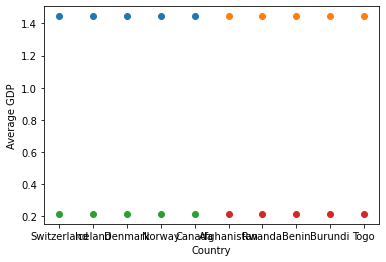

In [94]:
# for column in top_averages.columns.tolist()[1:]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average GDP'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average GDP'])
plt.xlabel('Country')
plt.ylabel('Average GDP')

Text(0, 0.5, 'Average GDP')

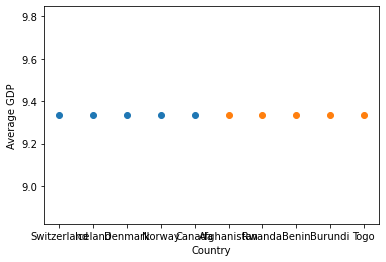

In [95]:

plt.scatter(x = top_averages['Country'], y = top_averages['Average Life Expectancy'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Life Expectancy'])
plt.xlabel('Country')
plt.ylabel('Average GDP')

Text(0, 0.5, 'Average GDP')

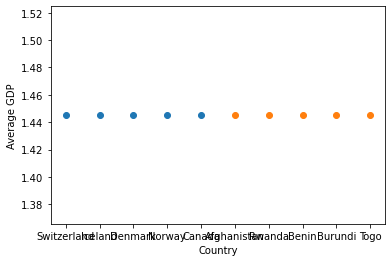

In [96]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Freedom'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Freedom'])
plt.xlabel('Country')
plt.ylabel('Average GDP')

Text(0, 0.5, 'Average GDP')

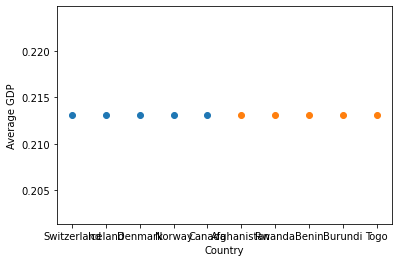

In [97]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Trust'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Trust'])
plt.xlabel('Country')
plt.ylabel('Average GDP')

Text(0, 0.5, 'Average GDP')

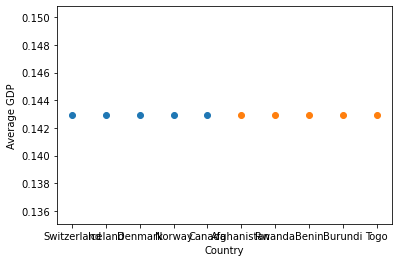

In [98]:
plt.scatter(x = top_averages['Country'], y = top_averages['Average Generosity'])
plt.scatter(x = bottom_averages['Country'], y = bottom_averages['Average Generosity'])
plt.xlabel('Country')
plt.ylabel('Average GDP')

## note: this graph is much cleaner but the y axis is clearly skewed because each attribute has a different number scale

Text(0.5, 1.0, '5 year Average of Attributes for Bottom 5 Countries')

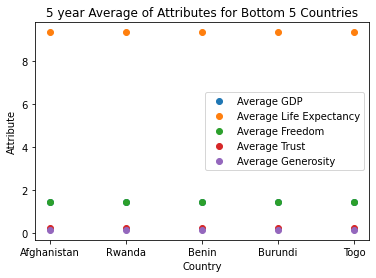

In [100]:
for column in bottom_averages.columns.tolist()[1:]:
    plt.scatter(x = bottom_averages['Country'], y = bottom_averages[column])
    plt.xlabel('Country')
plt.ylabel("Attribute")
plt.legend(bottom_averages.columns.tolist()[1:])
plt.title('5 year Average of Attributes for Bottom 5 Countries')